## Business problem

## Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,f_regression,SelectKBest,f_classif

## Creating the UDF's

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

### Importing the Data

In [3]:

url ='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
df=pd.read_csv(url)

In [4]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Inspection of DATA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 30 entries, 0 to 29

Data columns (total 17 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   W       30 non-null     int64  

 1   R       30 non-null     int64  

 2   AB      30 non-null     int64  

 3   H       30 non-null     int64  

 4   2B      30 non-null     int64  

 5   3B      30 non-null     int64  

 6   HR      30 non-null     int64  

 7   BB      30 non-null     int64  

 8   SO      30 non-null     int64  

 9   SB      30 non-null     int64  

 10  RA      30 non-null     int64  

 11  ER      30 non-null     int64  

 12  ERA     30 non-null     float64

 13  CG      30 non-null     int64  

 14  SHO     30 non-null     int64  

 15  SV      30 non-null     int64  

 16  E       30 non-null     int64  

dtypes: float64(1), int64(16)

memory usage: 4.1 KB


#### The Datatype are ok for all columns and the coulmns all contains continous data

In [6]:
# check the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### There are no null values present in Data.

In [7]:
# Checks duplicates records 
df.duplicated().sum()

0

#### There are no duplicated records present in the dataset

In [8]:
# shape of the data
df.shape

(30, 17)

In [9]:
# Descriptive analysis for the  data
df.apply(continuous_var_summary)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
N,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,2429.000000,20647.000000,165488.000000,42106.000000,8242.000000,939.000000,4909.000000,14073.000000,37446.000000,2505.000000,20647.000000,19075.000000,118.690000,104.000000,339.000000,1292.000000,2830.000000
MEAN,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.200000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
MEDIAN,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.500000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
STD,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.759470,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
VAR,109.274713,3452.943678,4965.650575,3265.085057,327.443678,109.251724,1012.722989,3255.127586,10766.027586,520.534483,5199.564368,4919.729885,0.206196,7.636782,16.975862,61.926437,194.850575
MIN,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
P1,63.290000,584.600000,5394.280000,1326.030000,238.030000,14.160000,105.800000,377.320000,1011.860000,46.030000,545.300000,493.660000,3.018300,0.000000,4.000000,29.740000,75.580000
P5,65.350000,617.050000,5418.350000,1335.500000,244.350000,17.000000,124.500000,384.800000,1112.400000,51.450000,595.450000,538.300000,3.277500,0.000000,4.900000,34.450000,77.000000


### EDAs

#### --Univariate--

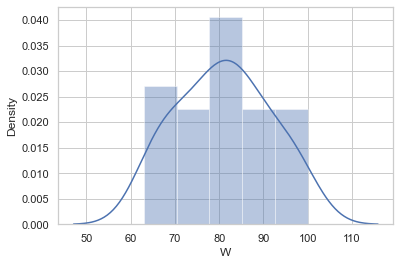

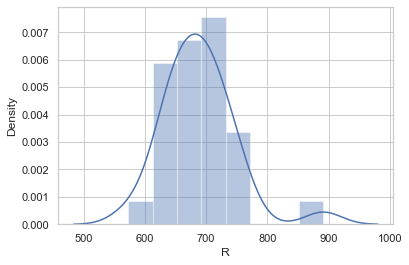

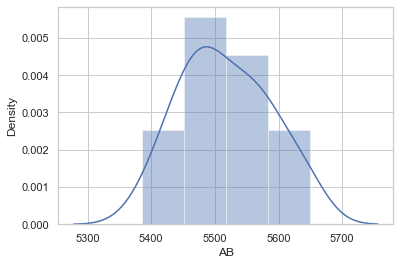

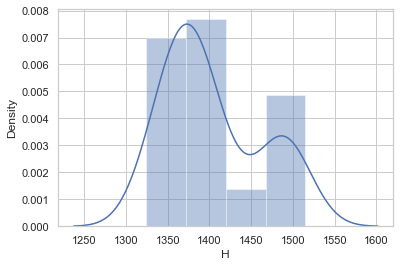

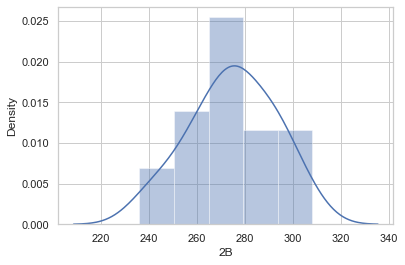

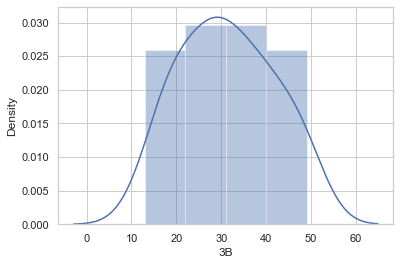

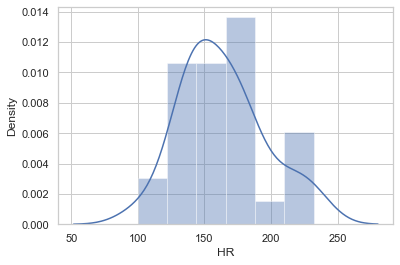

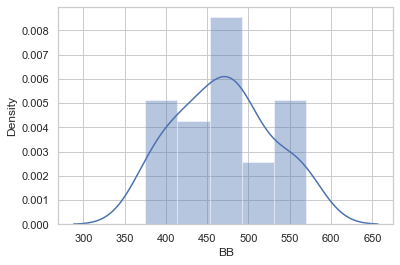

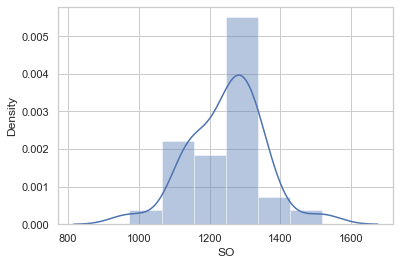

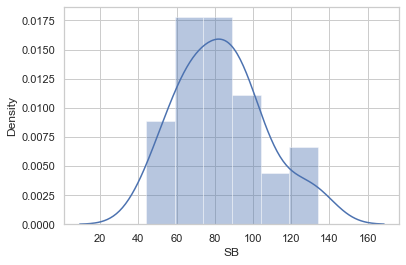

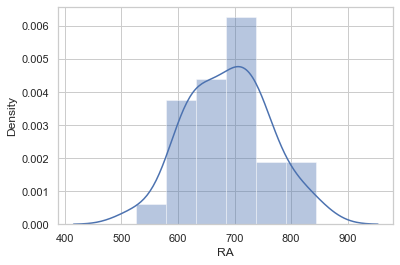

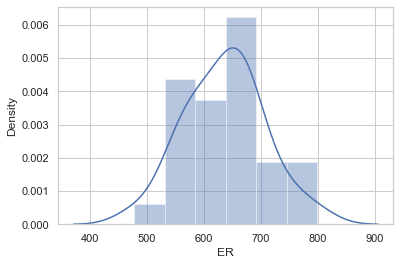

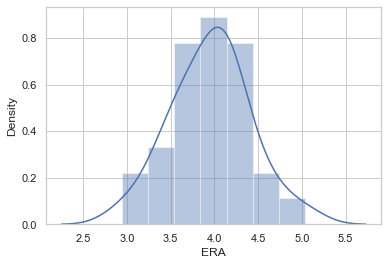

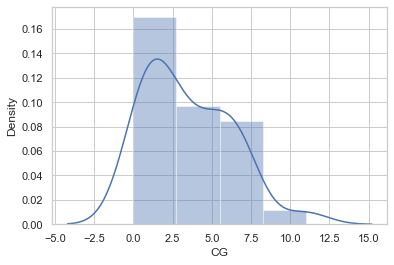

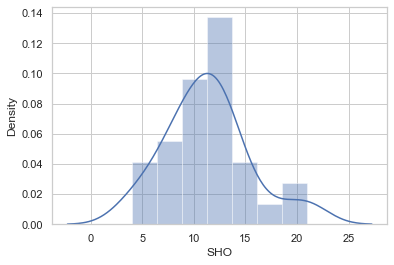

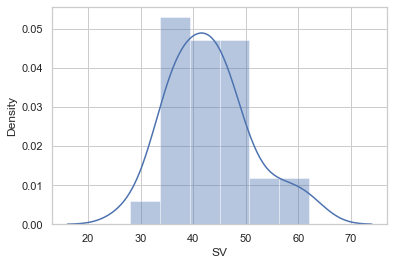

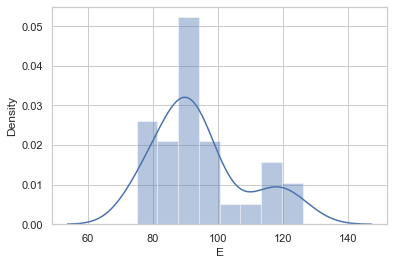

In [10]:
# Check Normality of  data
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

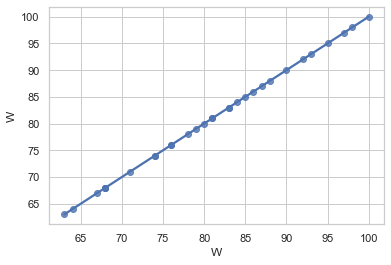

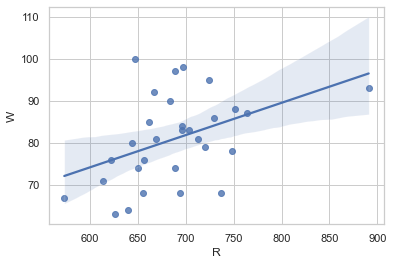

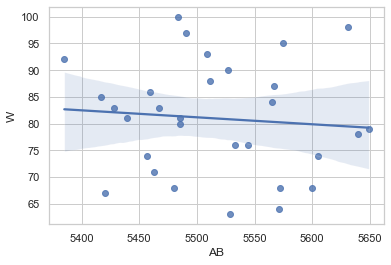

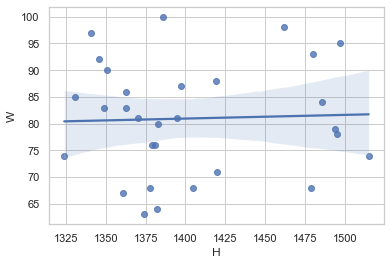

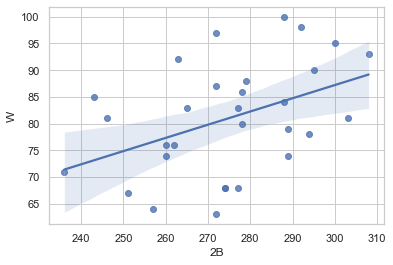

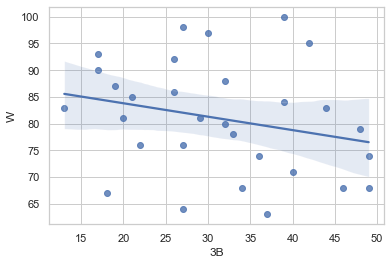

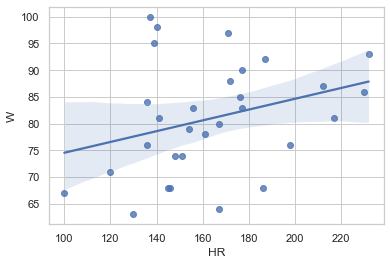

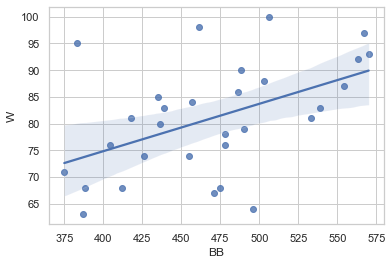

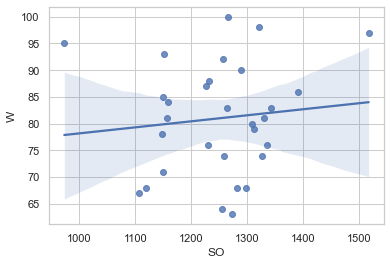

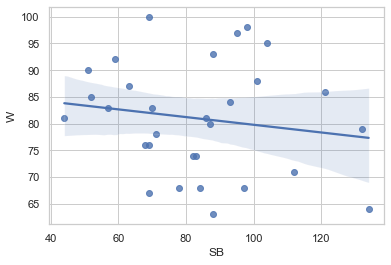

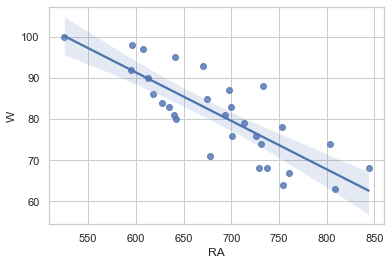

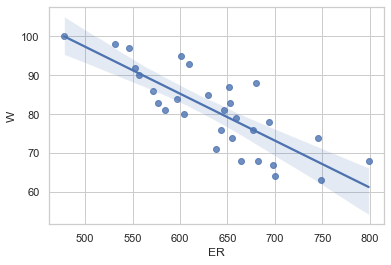

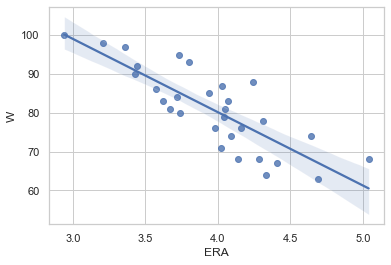

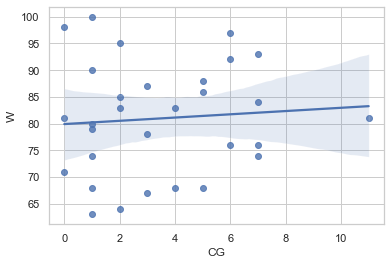

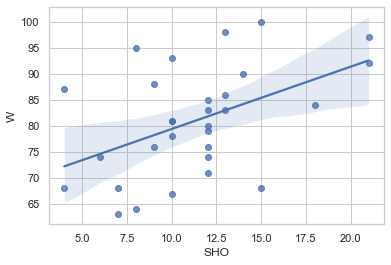

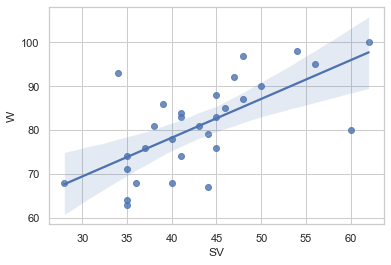

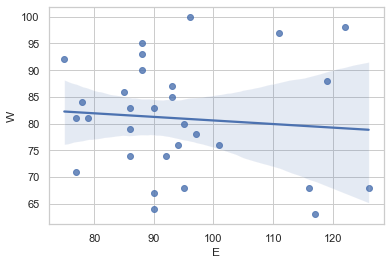

In [11]:
for i in df.columns:
    sns.regplot(x=i,y='W',data=df)
    plt.show()

In [12]:
# Check skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

#### CG,E,H,R,SO contains some skewnes and the normally ditributed target value contains 0.047 skewness

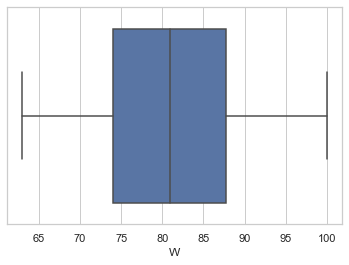

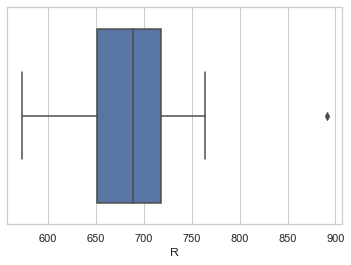

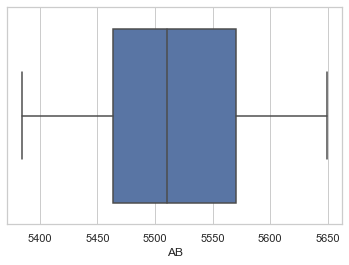

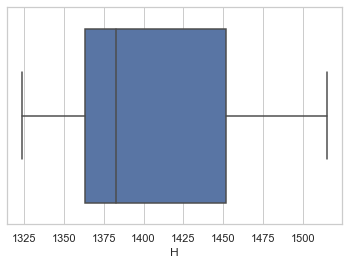

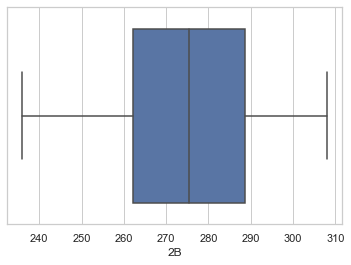

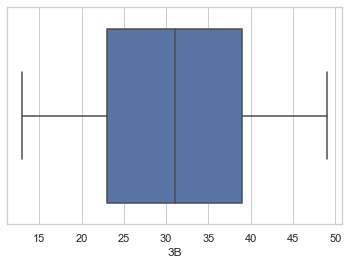

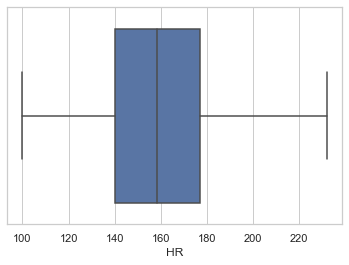

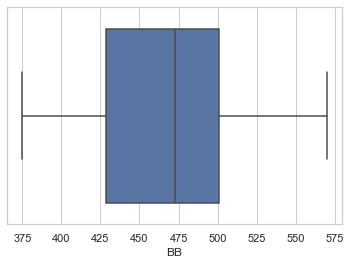

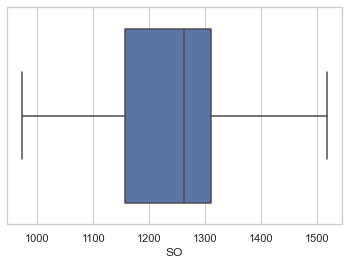

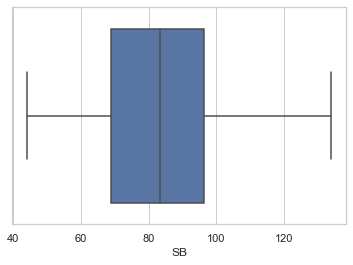

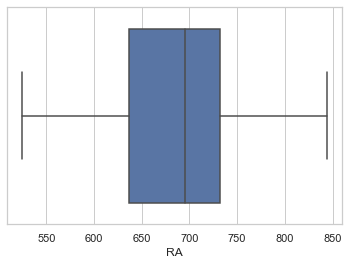

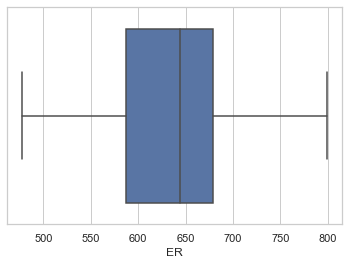

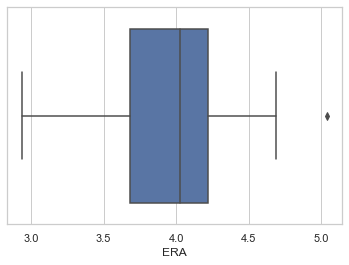

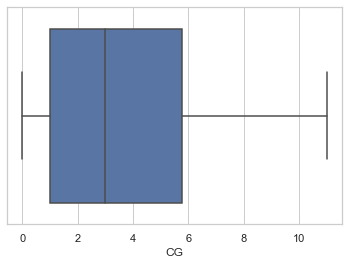

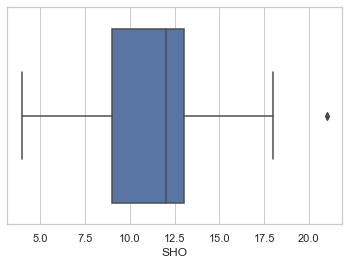

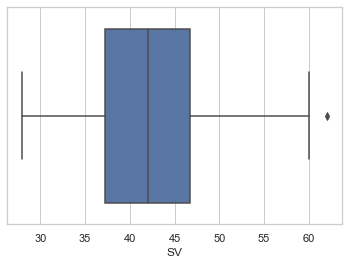

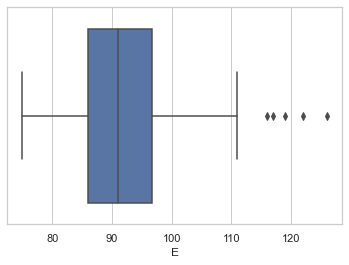

In [13]:
# Check outliers using boxplot
for col in df.columns:
    sns.boxplot(df[col])
    
    plt.show()

In [1]:

# As there are outliers present in R,ERA,SHO,SV,E features 

##### OUTLIERS 

In [15]:
data=df.copy()

In [16]:
# find the IQR to identify outliers

# 1st quartile
q1=data.quantile(0.25)

# 3st quartile
q3=data.quantile(0.75)

# IQR
iqr= q3-q1

In [17]:
# R
r_high= q3.R +(1.5*iqr.R)
r_high

818.75

In [18]:
# check the indexes which have higher values
index= np.where(df.R > r_high)
index

(array([5], dtype=int64),)

In [19]:
# drop the index which found in the above cell 
data=data.drop(df.index[index])
data.shape

(29, 17)

In [20]:
data.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [21]:
# ERA
era_high= q3.ERA +(1.5*iqr.ERA)
era_high

5.026250000000001

In [22]:

# check the indexes which have higher values
index= np.where(df.ERA > era_high)
index

(array([29], dtype=int64),)

In [23]:
# drop the index which found in the above cell 
data=data.drop(df.index[index])
data.shape

(28, 17)

In [24]:
data.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [25]:
# SHO
sho_high= q3.SHO +(1.5*iqr.SHO)
sho_high

19.0

In [26]:
# check the indexes which have higher values
index= np.where(df.SHO > sho_high)
index

(array([17, 25], dtype=int64),)

In [27]:
# drop the index which found in the above cell 
data=data.drop(df.index[index])
data.shape

(26, 17)

In [28]:
data.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [29]:
# SV
sv_high= q3.SV +(1.5*iqr.SV)
sv_high

61.0

In [30]:
# check the indexes which have higher values
index= np.where(df.SV > sv_high)
index

(array([15], dtype=int64),)

In [31]:
# drop the index which found in the above cell 
data=data.drop(df.index[index])
data.shape

(25, 17)

In [32]:
data.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [33]:
# E
e_high= q3.E +(1.5*iqr.E)
e_high

112.875

In [34]:
# check the indexes which have higher values
index= np.where(df.E> e_high)
index

(array([10, 14, 16, 18, 24], dtype=int64),)

In [35]:
# drop the index which found in the above cell 
data=data.drop(df.index[index])
data.shape

(20, 17)

In [36]:
# data loss using IQR
data_loss= (abs(20-30)/30)*100
data_loss

33.33333333333333

In [37]:
# we will not use this method try z-score instead.

In [38]:
# Z-score
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print('dta_loss',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)
                    

dta_loss 3.3333333333333335


In [39]:
# we will go with z-score method as less data loss with only 3.33%

In [40]:
df_new.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [41]:
df_new.shape

(29, 17)

#### Bivariate analysis

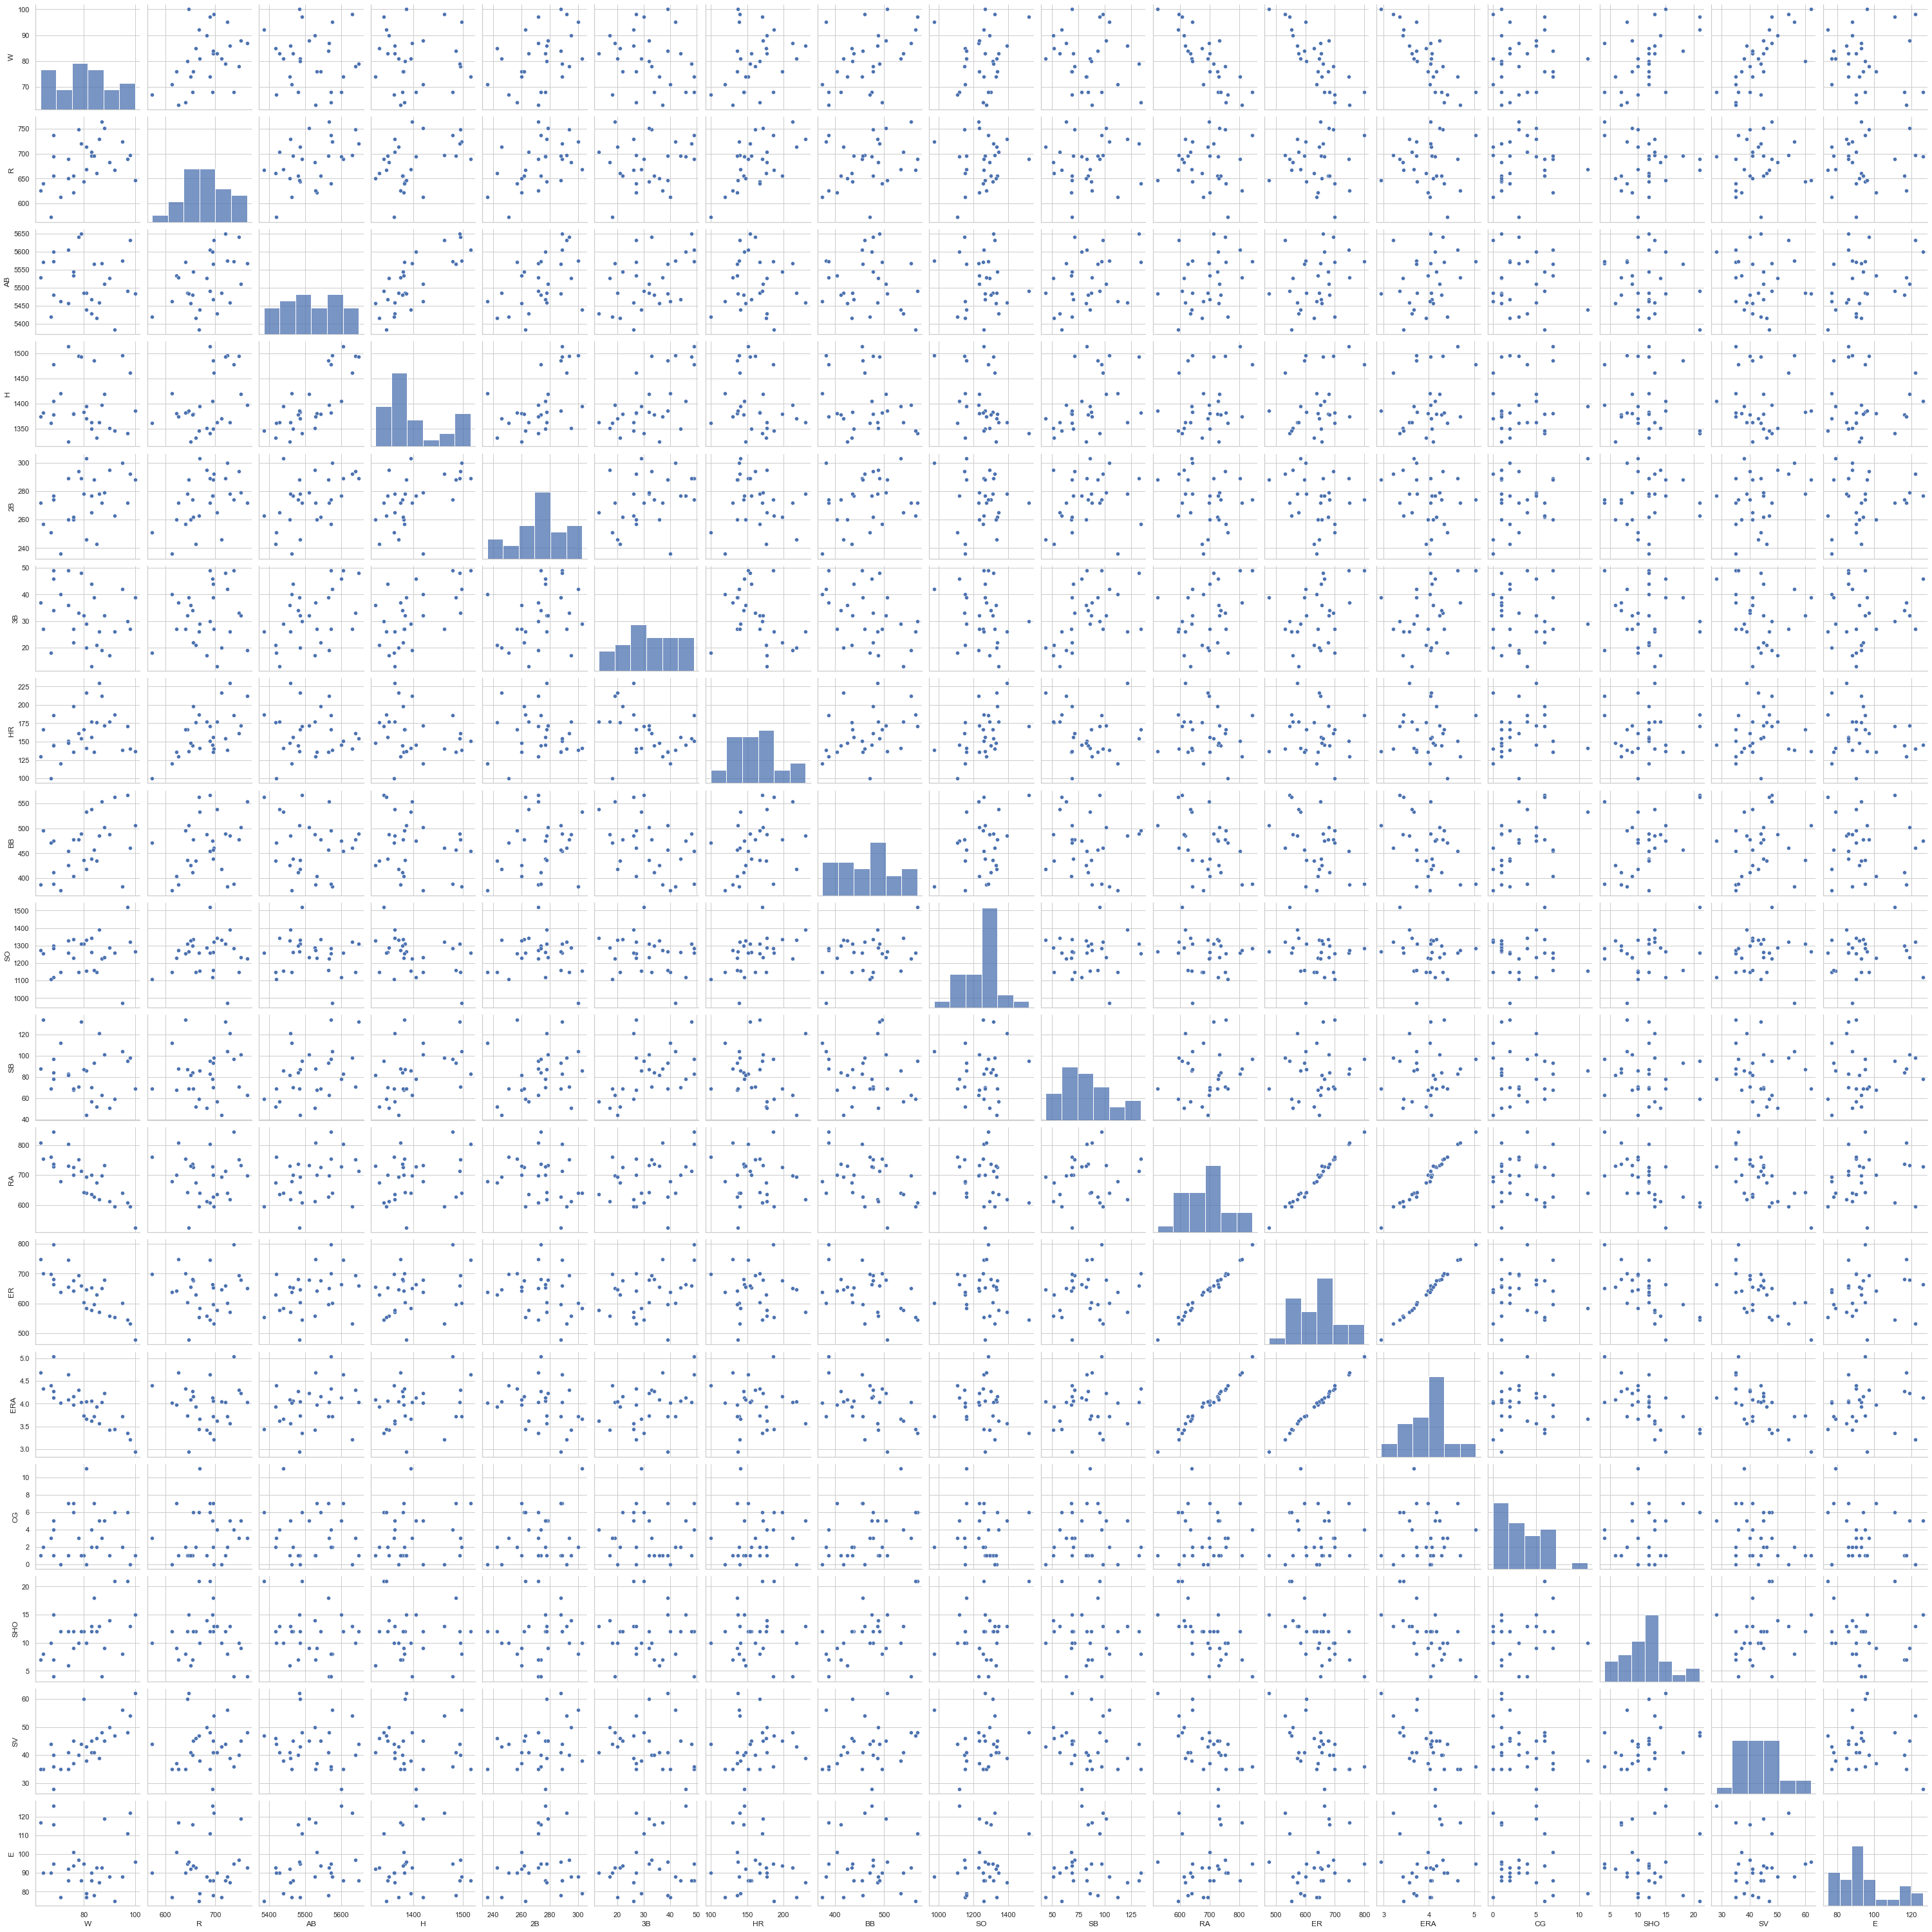

In [42]:
sns.pairplot(df_new)
plt.show()

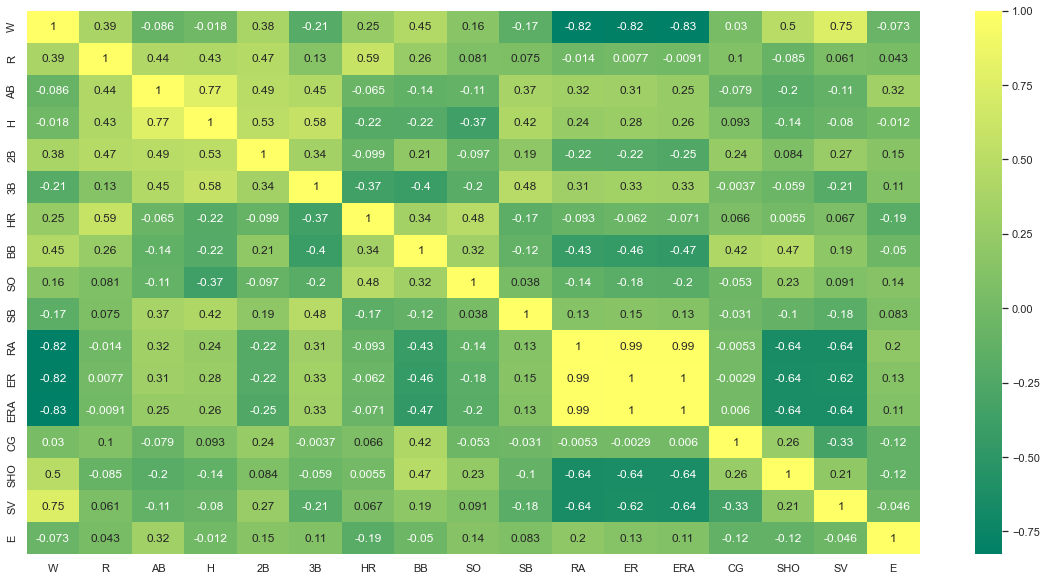

In [43]:

# heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr(), annot=True,cmap='summer')
plt.show()

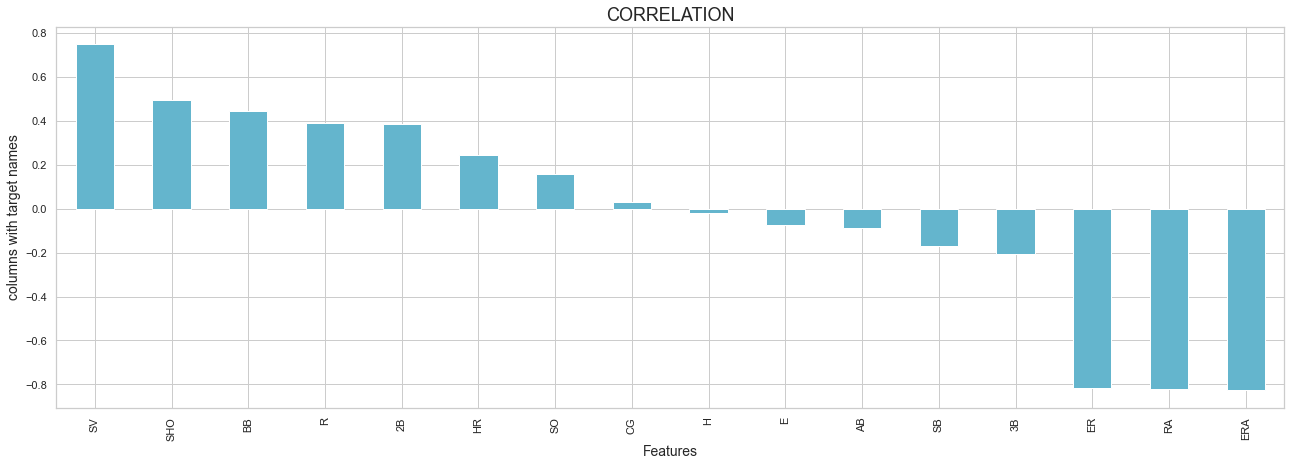

In [44]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(22,7))
df_new.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [45]:
# Droping Features
df_final=df_new.drop(['RA','ER'], axis=1)

In [46]:
# shape of dataset after droping features
df_final.shape

(29, 15)

In [47]:
df_final.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [48]:
#df_trial=df_final.copy()

In [49]:
#df_trial[['H','CG','E']]=np.log(df_trial[['H','CG','E']]+1)

In [50]:
# Use power transformer {yeo-johnson method} technique
scaler=PowerTransformer()

In [51]:
df_final[df_final.columns]=scaler.fit_transform(df_final[df_final.columns])

In [52]:
# Check skewness
df_final.skew()

W     -0.015560
R     -0.024842
AB     0.081092
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

------------------------------------------------------------------------------------------------------------------------------

### Reduction of the Variable

In [53]:
X = df_final[df_final.columns.difference(['W'])]
y = df_final.W

#### RFE

In [54]:
rfe = RFE(LinearRegression(), n_features_to_select=8).fit(X,y)

In [55]:
l1_rfe = X.columns[rfe.get_support()]

In [56]:
l1_rfe

Index(['2B', 'BB', 'CG', 'ERA', 'HR', 'R', 'SHO', 'SV'], dtype='object')

#### F-regression

In [57]:
F_values, p_values  = f_regression(X, y )

In [58]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(X.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [59]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(10)

In [60]:
f_reg_results

,Variable,F_Value,P_Value
6,ERA,57.031259,0.000
13,SV,35.472245,0.000
11,SHO,8.141010,0.008
3,BB,6.633359,0.016
0,2B,4.880994,0.036
9,R,4.861711,0.036
8,HR,2.225406,0.147
1,3B,1.192902,0.284
10,SB,0.964983,0.335
12,SO,0.838668,0.368


In [61]:
l2_fr=f_reg_results[:6]['Variable'].values  # CI=0.9 

In [62]:
l2_fr

array(['ERA', 'SV', 'SHO', 'BB', '2B', 'R'], dtype=object)

### SKB

In [63]:
SKB = SelectKBest(f_classif, k=8).fit(X, y )

In [64]:
l3_skb = X.columns[SKB.get_support()]

In [65]:
l3_skb

Index(['AB', 'E', 'ERA', 'R', 'SB', 'SHO', 'SO', 'SV'], dtype='object')

In [66]:
list(set(list(l1_rfe)+list(l2_fr)+list(l3_skb)))

['ERA', 'R', 'BB', 'SHO', 'CG', 'E', 'SB', '2B', 'SO', 'HR', 'SV', 'AB']

In [67]:
final_list= ['ERA', 'R', 'BB', 'SHO', 'CG', 'E', 'SB', '2B', 'SO', 'HR', 'SV', 'AB']

-------------------------------------------------------------------------------------------------------------------------------

#### VIF check Multicollinarity

In [68]:
X_new = df_final[final_list]
y = y

In [69]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [70]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
9,4.098821,HR
0,3.857729,ERA
1,3.609896,R
7,2.820181,2B
3,2.466950,SHO
11,2.448986,AB
8,2.220247,SO
2,2.207265,BB
4,2.205717,CG
10,2.175722,SV


-------------------------------------------------------------------------------------------------------------------------------

## ML Algos

In [71]:
x=X_new
y=y

In [72]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(pred_train,y_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state ",i," The model performs very well")
        print("At random_state: ",i)
        print("Training R2_score is : ",round(r2_score(y_train,pred_train)*100,1))
        print("Testing R2_score is: ",round(r2_score(y_test,pred_test)*100,1),  '\n\n')

At random state  99  The model performs very well

At random_state:  99

Training R2_score is :  94.4

Testing R2_score is:  94.1 






In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

##### Standarization of data

In [74]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

### LinearRegression

In [75]:
lr=LinearRegression()
lr.fit(x_train_sc,y_train)
pred_train=lr.predict(x_train_sc)
pred_test=lr.predict(x_test_sc)
score_train=r2_score(y_train,pred_train)
score_test=r2_score(y_test,pred_test)
mse = mean_squared_error(y_test, pred_test)
print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))

R2_Score_train:  0.943661825573979

R2_Score_test:  0.9411092528474895

RMSE =  0.2966


#### Cross validation of the Model

In [77]:
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,scoring='r2',cv=i)
    cv_mean= cv_score.mean()
    cv_std= cv_score.std()
    print(f'At Cross fold {i} the cv score mean is {cv_mean*100} and the cv score std is {cv_std},testing accuracy score= {score_test*100}')
    print('\n')

At Cross fold 2 the cv score mean is -102.12665857337973 and the cv score std is 0.3902011898818617,testing accuracy score= 94.11092528474894





At Cross fold 3 the cv score mean is 48.738616258368225 and the cv score std is 0.3583632138203448,testing accuracy score= 94.11092528474894





At Cross fold 4 the cv score mean is 57.768310430831626 and the cv score std is 0.42715812640793516,testing accuracy score= 94.11092528474894





At Cross fold 5 the cv score mean is 48.827451584342256 and the cv score std is 0.4989628286989509,testing accuracy score= 94.11092528474894





At Cross fold 6 the cv score mean is 47.576647409493965 and the cv score std is 0.6079208094056023,testing accuracy score= 94.11092528474894





At Cross fold 7 the cv score mean is 35.024562433244014 and the cv score std is 0.6294523729392513,testing accuracy score= 94.11092528474894





At Cross fold 8 the cv score mean is 49.27768275949687 and the cv score std is 0.6073850333766802,testing accuracy score= 

In [78]:
# i will chosse CV with 4 but it is not near the training data 

In [79]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [80]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.2,random_state=73)
    name=[]
    meanabs=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=4)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [81]:
createmodels(models,X,y,names)

,Mean Absolute Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,
KNeighborsRegressor,0.7353,0.8285,-1.82,0.4621
SVR,0.7696,0.8350,-2.72,0.2596
LinearRegression,0.3132,0.3563,0.87,0.4652
Lasso,1.0420,1.1577,0.00,-0.1916
Ridge,0.3031,0.3679,0.84,0.6114
DecisionTreeRegressor,0.4712,0.6896,0.61,-0.5548
RandomForestRegressor,0.6249,0.7274,-0.34,0.4526
AdaBoostRegressor,0.6170,0.7092,0.02,0.4729
GradientBoostingRegressor,0.5500,0.6058,0.46,0.2080


### Saving the Model

In [82]:
#Saving the model using .pkl
import joblib
joblib.dump(lr,"baseball.pkl")

['baseball.pkl']

In [83]:
#Loading the saved model
p=joblib.load("baseball.pkl")

In [84]:
#Prediction
prediction = p.predict(x_test_sc)
prediction

array([-0.96839107, -2.04628526,  1.39315848, -0.35277636,  0.80125564,
        1.02639973])

In [87]:
pd.DataFrame([p.predict(x_test_sc)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5
Predicted,-0.968391,-2.046285,1.393158,-0.352776,0.801256,1.026400
Original,-1.360780,-1.805273,1.558318,-0.415211,0.275099,1.113526
